In [1]:
import GSDUncertainty
import GrainSizing
import plotting

import matplotlib.pyplot as plt

In [2]:
PATH = "F:/cellpose/code_demo/"
gsds = GrainSizing.load.load_grain_set([PATH],gsd_str='re_scaled',filter_str='0')

## Calculate percentile uncertainties

In [3]:
res_dict_bs = GSDUncertainty.calculate.dataset_uncertainty(gsds,mute=True)

bootstrapping: 100%|██████████| 7/7 [00:01<00:00,  6.73gsd/s]


In [4]:
res_dict_mc = GSDUncertainty.calculate.dataset_uncertainty(gsds,method='MC',scale_err=[.1],length_err=[1],num_it=100,mute=True)

MC: 100%|██████████| 7/7 [00:36<00:00,  5.21s/gsd]


In [5]:
sfm_error_l = GSDUncertainty.calculate.compile_sfm_error(from_file=PATH+'OM_err.csv')

In [6]:
res_dict_om = GSDUncertainty.calculate.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,sfm_type='OM',num_it=100,mute=True)

MC_SfM: 100%|██████████| 7/7 [01:03<00:00,  9.10s/gsd]


In [7]:
res_dict_si = GSDUncertainty.calculate.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,num_it=100,mute=True)

MC_SfM: 100%|██████████| 7/7 [01:09<00:00,  9.92s/gsd]


### Compare uncertainty methods

In [8]:
mcs,ids = GSDUncertainty.load.read_set_unc(PATH)
elem={
        'CI_bounds':'','median':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

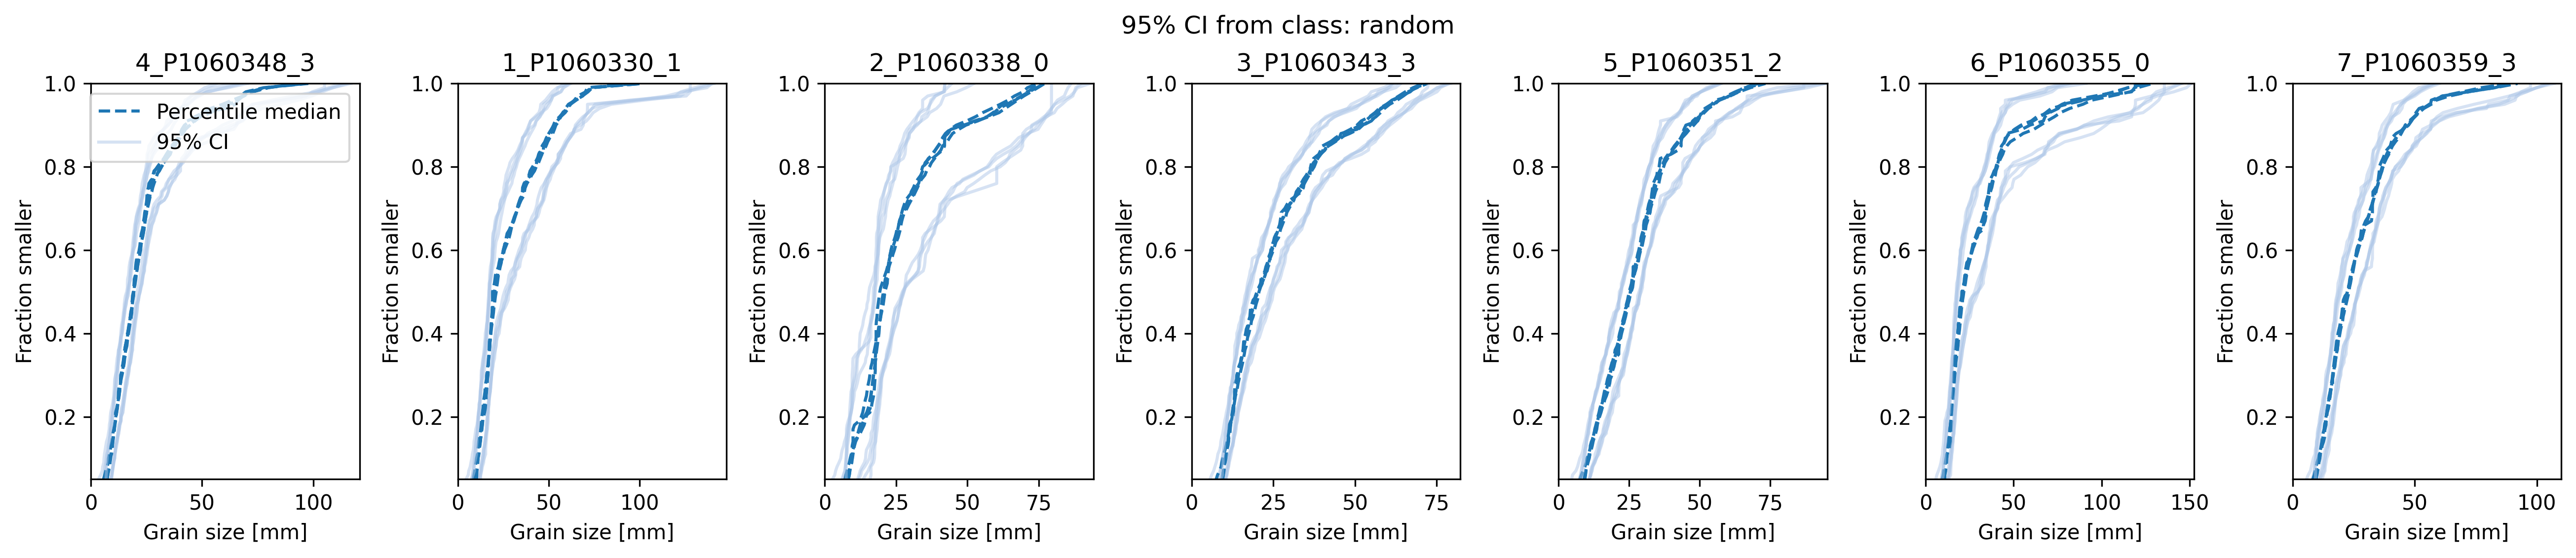

In [9]:
fig = plt.figure(figsize=(len(ids)*2.5,10), dpi=300)
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            df = GSDUncertainty.load.read_unc(mcs[i])
            plt.subplot(3,len(ids),j+1)
            plotting.uncertainty.plot_gsd(df,elem=elem)
            plt.title(ids[j])
            if i == 0:
                plt.legend()
    plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.suptitle('95% CI from class: random')
plt.tight_layout()

### Compare images

In [12]:
elem={
        'CI_area':'','input':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

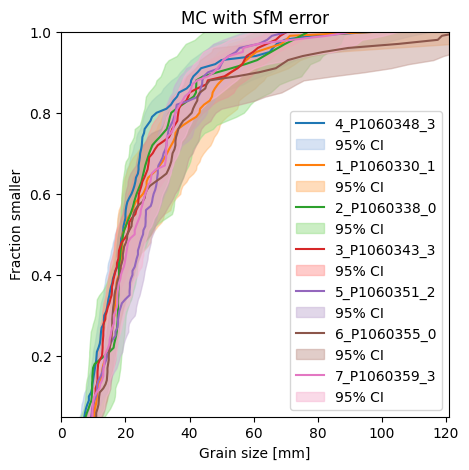

In [14]:
plt.figure(figsize=(5,5))
cix=0
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            if 'SfM' in mcs[i]:
                df = GSDUncertainty.load.read_unc(mcs[i])
                plotting.uncertainty.plot_gsd(df,elem=elem,data_ID=ids[j],cix=cix)
    cix+=2
plt.title('MC with SfM error')
plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.legend();